<a href="https://colab.research.google.com/github/tusharsuthar4828/DataScience_Assigments/blob/main/SupportVectorMachines_SalaryData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale 

from numpy import set_printoptions
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.tree import  DecisionTreeClassifier

import warnings
warnings.filterwarnings('ignore')

In [2]:
# load the data
test = pd.read_csv('/content/SalaryData_Test(1).csv')
test.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K


In [3]:
train = pd.read_csv('/content/SalaryData_Train(1).csv')
train.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:
#Checking for null values & data types
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15060 entries, 0 to 15059
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            15060 non-null  int64 
 1   workclass      15060 non-null  object
 2   education      15060 non-null  object
 3   educationno    15060 non-null  int64 
 4   maritalstatus  15060 non-null  object
 5   occupation     15060 non-null  object
 6   relationship   15060 non-null  object
 7   race           15060 non-null  object
 8   sex            15060 non-null  object
 9   capitalgain    15060 non-null  int64 
 10  capitalloss    15060 non-null  int64 
 11  hoursperweek   15060 non-null  int64 
 12  native         15060 non-null  object
 13  Salary         15060 non-null  object
dtypes: int64(5), object(9)
memory usage: 1.6+ MB


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30161 entries, 0 to 30160
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            30161 non-null  int64 
 1   workclass      30161 non-null  object
 2   education      30161 non-null  object
 3   educationno    30161 non-null  int64 
 4   maritalstatus  30161 non-null  object
 5   occupation     30161 non-null  object
 6   relationship   30161 non-null  object
 7   race           30161 non-null  object
 8   sex            30161 non-null  object
 9   capitalgain    30161 non-null  int64 
 10  capitalloss    30161 non-null  int64 
 11  hoursperweek   30161 non-null  int64 
 12  native         30161 non-null  object
 13  Salary         30161 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.2+ MB


In [6]:
# one hot encoding

In [10]:
train1 = train.iloc[:,0:13]

train1 = pd.get_dummies(train1)
train1

,age,educationno,capitalgain,capitalloss,hoursperweek,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,workclass_ Without-pay,education_ 10th,education_ 11th,education_ 12th,education_ 1st-4th,education_ 5th-6th,education_ 7th-8th,education_ 9th,education_ Assoc-acdm,education_ Assoc-voc,education_ Bachelors,education_ Doctorate,education_ HS-grad,education_ Masters,education_ Preschool,education_ Prof-school,education_ Some-college,maritalstatus_ Divorced,maritalstatus_ Married-AF-spouse,maritalstatus_ Married-civ-spouse,maritalstatus_ Married-spouse-absent,maritalstatus_ Never-married,maritalstatus_ Separated,maritalstatus_ Widowed,occupation_ Adm-clerical,occupation_ Armed-Forces,occupation_ Craft-repair,occupation_ Exec-managerial,occupation_ Farming-fishing,...,native_ Cambodia,native_ Canada,native_ China,native_ Columbia,native_ Cuba,native_ Dominican-Republic,native_ Ecuador,native_ El-Salvador,native_ England,native_ France,native_ Germany,native_ Greece,native_ Guatemala,native_ Haiti,native_ Honduras,native_ Hong,native_ Hungary,native_ India,native_ Iran,native_ Ireland,native_ Italy,native_ Jamaica,native_ Japan,native_ Laos,native_ Mexico,native_ Nicaragua,native_ Outlying-US(Guam-USVI-etc),native_ Peru,native_ Philippines,native_ Poland,native_ Portugal,native_ Puerto-Rico,native_ Scotland,native_ South,native_ Taiwan,native_ Thailand,native_ Trinadad&Tobago,native_ United-States,native_ Vietnam,native_ Yugoslavia
0,39,13,2174,0,40,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,50,13,0,0,13,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,38,9,0,0,40,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,53,7,0,0,40,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,28,13,0,0,40,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,27,12,0,0,38,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
30157,40,9,0,0,40,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
30158,58,9,0,0,40,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
30159,22,9,0,0,20,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [9]:
test1 = test.iloc[:,0:13]

test1 = pd.get_dummies(test1)
test1


,age,educationno,capitalgain,capitalloss,hoursperweek,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,workclass_ Without-pay,education_ 10th,education_ 11th,education_ 12th,education_ 1st-4th,education_ 5th-6th,education_ 7th-8th,education_ 9th,education_ Assoc-acdm,education_ Assoc-voc,education_ Bachelors,education_ Doctorate,education_ HS-grad,education_ Masters,education_ Preschool,education_ Prof-school,education_ Some-college,maritalstatus_ Divorced,maritalstatus_ Married-AF-spouse,maritalstatus_ Married-civ-spouse,maritalstatus_ Married-spouse-absent,maritalstatus_ Never-married,maritalstatus_ Separated,maritalstatus_ Widowed,occupation_ Adm-clerical,occupation_ Armed-Forces,occupation_ Craft-repair,occupation_ Exec-managerial,occupation_ Farming-fishing,...,native_ Cambodia,native_ Canada,native_ China,native_ Columbia,native_ Cuba,native_ Dominican-Republic,native_ Ecuador,native_ El-Salvador,native_ England,native_ France,native_ Germany,native_ Greece,native_ Guatemala,native_ Haiti,native_ Honduras,native_ Hong,native_ Hungary,native_ India,native_ Iran,native_ Ireland,native_ Italy,native_ Jamaica,native_ Japan,native_ Laos,native_ Mexico,native_ Nicaragua,native_ Outlying-US(Guam-USVI-etc),native_ Peru,native_ Philippines,native_ Poland,native_ Portugal,native_ Puerto-Rico,native_ Scotland,native_ South,native_ Taiwan,native_ Thailand,native_ Trinadad&Tobago,native_ United-States,native_ Vietnam,native_ Yugoslavia
0,25,7,0,0,40,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,38,9,0,0,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,28,12,0,0,40,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,44,10,7688,0,40,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,34,6,0,0,30,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,13,0,0,40,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
15056,39,13,0,0,36,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
15057,38,13,0,0,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
15058,44,13,5455,0,40,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [11]:
#PCA to decide best features

In [12]:
# min max scaler
from sklearn.preprocessing import MinMaxScaler
trans = MinMaxScaler()
train_scaler = pd.DataFrame(trans.fit_transform(train1))
test_scaler = pd.DataFrame(trans.fit_transform(test1))

In [13]:
pca_train = PCA(n_components = 102)
pca_train_values = pca_train.fit_transform(train_scaler)
var = pca_train.explained_variance_ratio_
var1 = np.cumsum(np.round(var,decimals = 4)*100)
var1

array([19.42, 27.36, 34.3 , 40.13, 45.  , 49.69, 53.89, 57.2 , 60.27,
       62.99, 65.66, 68.19, 70.45, 72.53, 74.44, 76.26, 77.9 , 79.45,
       80.74, 81.95, 83.09, 84.15, 85.19, 86.17, 87.08, 87.91, 88.71,
       89.49, 90.23, 90.97, 91.68, 92.38, 93.04, 93.64, 94.12, 94.56,
       94.97, 95.37, 95.73, 96.06, 96.37, 96.67, 96.96, 97.24, 97.49,
       97.69, 97.88, 98.06, 98.19, 98.31, 98.42, 98.53, 98.62, 98.7 ,
       98.78, 98.85, 98.92, 98.99, 99.06, 99.12, 99.17, 99.22, 99.27,
       99.32, 99.37, 99.41, 99.45, 99.49, 99.53, 99.57, 99.6 , 99.63,
       99.66, 99.68, 99.7 , 99.72, 99.74, 99.76, 99.78, 99.8 , 99.82,
       99.83, 99.84, 99.85, 99.86, 99.87, 99.88, 99.89, 99.9 , 99.91,
       99.92, 99.93, 99.94, 99.94, 99.94, 99.94, 99.94, 99.94, 99.94,
       99.94, 99.94, 99.94])

In [14]:
pca_test = PCA(n_components = 102)
pca_test_values = pca_test.fit_transform(test_scaler)

In [15]:
#Best columns

In [16]:
finaltrain = pd.concat([pd.DataFrame(pca_train_values[:,0:50]),
                     train[['Salary']]], axis = 1)
finaltrain

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,Salary
0,0.511884,-0.570399,0.985410,0.869147,0.301768,-0.160966,-0.069890,-0.248351,0.292375,-0.204779,-0.904007,0.077747,0.637117,-0.287869,-0.256156,-0.115223,0.054774,-0.071430,-0.186325,-0.357408,0.553539,-0.071704,-0.102062,-0.257893,0.300682,-0.407225,0.079428,0.170541,-0.124316,-0.032928,-0.119882,-0.042538,-0.083553,0.002422,0.041473,-0.099544,0.109199,-0.035643,-0.001017,0.037714,-0.037616,0.030888,-0.009637,0.023509,0.032497,-0.008378,-0.012893,0.010010,0.008061,0.004295,<=50K
1,-1.186474,0.389451,0.805358,0.407706,0.380658,-0.302254,-0.106618,0.209061,0.920905,-0.145158,0.135624,0.361470,0.097292,-0.088496,-0.034929,0.092712,-0.566645,-0.090504,0.000872,0.113623,-0.262536,0.034858,0.000791,-0.060241,0.046269,-0.084845,0.057389,0.094760,0.171071,-0.106453,-0.077707,-0.039914,-0.077839,0.110073,0.018750,-0.003875,-0.062239,-0.068616,0.066676,0.054721,-0.031810,0.040729,0.169355,0.027562,-0.279358,-0.006266,-0.023825,0.011086,0.001754,0.004931,<=50K
2,0.327319,-0.448965,-0.614483,1.019098,-0.704198,0.351374,0.014607,0.297586,0.005990,0.073360,-0.067686,-0.410153,0.032373,-0.125615,0.394672,0.162516,-0.023693,0.065716,0.342667,-0.082125,0.037271,0.156367,0.728052,-0.215497,0.226710,0.200902,-0.026090,0.076305,0.022612,-0.189716,-0.178580,0.001265,-0.025040,-0.061279,-0.009576,-0.041349,0.020877,0.004001,-0.023350,-0.014385,-0.023459,-0.013262,0.007118,-0.008797,-0.031967,-0.002822,-0.007099,0.012725,0.000795,0.000232,<=50K
3,-0.872767,-0.017105,-0.213117,-0.454347,0.086417,0.047109,1.242660,-0.134197,-0.038709,0.072120,-0.014165,-0.132682,-0.090694,-0.148462,0.242219,-0.632580,-0.178655,0.156845,0.317185,0.115738,0.090321,0.431073,0.796471,-0.500316,-0.062773,0.123212,-0.008842,0.393720,0.033923,-0.221272,0.329975,0.214018,-0.367219,-0.021634,-0.125355,-0.040484,0.070297,-0.205989,-0.005365,0.055270,-0.002881,0.029573,-0.027681,-0.032428,0.074622,-0.052941,-0.003730,0.007214,-0.023176,-0.005332,<=50K
4,0.371012,1.147050,0.312747,-0.460719,0.180534,-1.024316,1.292872,-0.349665,-0.469696,0.025009,-0.022291,0.258435,-0.059594,0.163371,0.447254,0.715066,-0.203189,0.094083,0.567941,-0.419083,0.044365,-0.148576,-0.000083,-0.033206,-0.222046,-0.257784,-0.136073,-0.337731,-0.082323,-0.281389,0.112053,-0.065336,-0.167110,0.022942,-0.171913,0.015939,-0.084079,-0.100753,-0.141473,-0.246729,-0.066227,-0.006947,0.049808,0.164154,0.033541,0.052217,-0.042265,-0.048384,-0.018132,-0.028936,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,0.294538,0.952058,-0.098474,-0.531724,-0.213346,-0.469396,-0.279332,-0.316085,-0.179942,-0.061729,0.209230,0.163608,-0.025360,0.040980,0.341059,-0.365847,-0.117580,0.254988,0.596860,-0.533698,0.194971,-0.450149,0.078133,0.154968,0.219079,0.388075,0.845302,-0.684728,-0.066365,0.268810,0.145406,0.114518,-0.259378,0.404894,0.002909,-0.112819,-0.120409,0.047159,-0.020610,-0.005665,-0.028398,0.001081,-0.018555,-0.004878,0.006175,-0.006878,-0.026817,0.003204,-0.003681,-0.009443,<=50K
30157,-1.001348,-0.091425,-0.831089,0.003952,-0.135485,-0.197470,-0.096730,-0.126849,-0.024601,0.013202,-0.005201,-0.388581,0.022855,0.026259,-0.049258,0.076522,-0.246483,0.605059,-0.512333,-0.171348,-0.110710,-0.064038,-0.094009,-0.006634,0.033878,0.050364,0.023196,0.051410,0.051953,-0.051490,-0.038284,0.015342,-0.023778,-0.028971,-0.025628,-0.042654,0.008369,-0.001696,-0.006295,0.000226,0.000356,0.012399,0.025686,-0.005910,-0.031552,-0.004978,-0.018105,-0.004142,0.001880,-0.000162,>50K
30158,0.942438,0.867860,-0.980524,-0.022298,-0.026156,-0.069330,-0.277006,0.235377,0.019852,-0.204333,-0.588726,-0.118223,0.283719,0.199392,-0.694515,-0.144427,-0.056789,-0.197872,0.063168,-0.041834,-0.077910,0.594410,-0.246736,0.150978,0.

In [17]:
finaltest = pd.concat([pd.DataFrame(pca_test_values[:,0:50]),
                     test[['Salary']]], axis = 1)
finaltest

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,Salary
0,0.544139,-1.082697,0.043718,-0.638660,0.600414,-0.037211,1.117301,0.303058,0.089471,-0.027091,0.051770,-0.155776,-0.093021,0.108021,0.541342,-0.506353,0.510797,0.688190,-0.314033,0.198760,-0.123575,0.162180,0.075419,-0.083012,-0.405034,-0.194579,0.043309,-0.247725,-0.143066,0.421255,0.012370,0.104439,-0.294233,-0.063554,-0.109451,-0.053825,-0.105380,-0.023649,-0.008416,0.003667,0.056327,-0.039742,-0.026572,0.067608,-0.043980,-0.048214,-0.031360,-0.005013,-0.000361,-0.008008,<=50K
1,-1.017577,-0.173468,-0.721000,0.034038,-0.051207,-0.169266,-0.173861,-0.133687,-0.010559,0.008086,0.020856,-0.251070,0.050603,-0.047309,-0.092641,0.004396,0.178123,-0.048955,0.057562,-0.160011,-0.009661,-0.100711,-0.144848,0.029229,0.061322,-0.009401,0.048748,0.366797,-0.239288,0.324449,-0.389687,-0.108576,0.487900,-0.437771,-0.079572,-0.169530,-0.073284,0.083500,-0.026039,-0.047067,-0.009754,-0.028487,0.020086,-0.024653,0.019499,-0.001208,0.038778,0.010639,-0.016478,-0.012826,<=50K
2,-1.079069,0.331812,0.385397,0.156170,0.541402,0.179608,-0.124271,-0.014775,-0.098975,-0.068643,0.000899,-0.168688,0.140924,-0.060332,0.035416,-0.370803,-0.655129,0.654910,0.152685,-0.190840,-0.202754,-0.284010,-0.116597,0.171243,0.126668,-0.074252,0.896585,0.072101,-0.035468,-0.318359,0.085642,-0.260791,-0.016460,-0.306581,-0.380948,0.594548,0.173630,-0.163868,-0.041933,0.014667,-0.034270,-0.010730,-0.047369,-0.047461,0.084653,0.013472,0.011303,0.007996,-0.008328,0.003764,>50K
3,-0.846450,-0.012312,-0.003005,-0.778263,-0.161833,0.679751,1.182308,-0.408033,0.064636,0.140687,-0.038390,-0.283773,-0.272626,-0.170996,0.061634,0.017611,0.507974,0.551848,-0.460346,0.135021,-0.198104,0.030946,0.001481,-0.048955,-0.014151,0.036269,-0.092159,0.034928,-0.001675,-0.089302,0.001788,-0.022444,-0.121255,-0.064373,-0.042419,-0.056448,-0.061334,0.016436,0.002250,-0.013698,0.015517,0.007125,-0.013947,-0.018003,0.047481,-0.018848,-0.019185,-0.000007,-0.003100,0.063413,>50K
4,0.613603,-0.980319,0.315324,0.309863,-0.254993,0.026711,0.039416,-0.213736,-0.160857,-0.153713,0.640255,0.066445,0.555111,-0.445089,-0.205901,-0.491086,-0.142891,-0.076849,0.021187,0.176187,-0.008879,-0.014781,0.043906,-0.011574,-0.189697,-0.016311,-0.026363,0.060601,0.052436,-0.327068,-0.163678,0.085574,0.460658,0.634397,-0.313948,-0.091546,-0.140431,-0.102293,0.005840,0.012038,0.007117,0.001472,0.000903,-0.034617,0.029876,0.001334,-0.026582,0.018164,0.016502,0.001699,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,0.392559,-0.799233,0.857450,-0.224953,0.264490,-0.949432,0.035834,0.698898,-0.383183,-0.172809,-0.274904,-0.209416,-0.212408,-0.256402,0.124608,0.301756,0.245995,-0.126953,0.076348,0.025171,-0.062636,0.204429,0.025816,0.144746,-0.041074,-0.017523,-0.011896,0.084694,-0.007184,-0.030403,-0.042241,0.096738,-0.002799,0.000768,0.048355,0.043603,-0.031737,-0.130399,0.077718,0.009335,0.016316,-0.006333,-0.000722,0.014517,-0.059677,-0.059991,-0.009347,0.002798,-0.000091,-0.015655,<=50K
15056,1.064367,0.803553,0.497037,0.719569,-0.820526,-0.579177,0.120411,0.287500,-0.512440,0.030903,-0.155200,-0.036082,-0.217489,-0.388248,0.353322,0.319105,0.234286,-0.055530,-0.092584,-0.276756,0.071000,-0.015381,-0.113931,0.025465,-0.144687,-0.027296,-0.037172,0.041358,-0.015081,0.017841,0.051903,-0.001935,0.060512,-0.030643,-0.014297,-0.004083,0.064110,-0.119375,0.008912,-0.030783,-0.037760,0.017556,-0.012311,-0.049600,0.014514,-0.006896,0.001337,-0.004356,-0.017986,-0.006914,<=50K
15057,-1.022440,0.211868,0.552672,-0.053465,-0.327323,-0.844022,0.221308,0.212895,-0.480768,-0.051884,-0.199057,-0.170840,-0.110327,-0.346412,-0.141747,0.227874,0.193933,-0.114596,-0.020078,-0.084278,-0.018392,0.077122,-0.094979,0.074

In [18]:
# will use some part of data as comands are taking really long time to execute with such big data set
array = finaltrain.values
X = array[0:2000:,0:50]
Y = array[0:2000:,50]

In [19]:
#KNN model

In [20]:
# Grid search CV to find best value for K

In [21]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

In [22]:
n_neighbors = np.array(range(1,40))
param_grid = dict(n_neighbors=n_neighbors)
model = KNeighborsClassifier()
grid = GridSearchCV(estimator=model, param_grid=param_grid)
grid.fit(X, Y)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39])})

In [23]:
print(grid.best_score_)
print(grid.best_params_)

0.8284999999999998
{'n_neighbors': 29}


In [24]:
# Visualizing the CV results

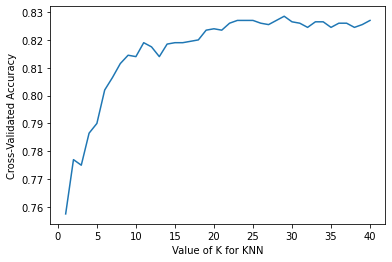

In [25]:
import matplotlib.pyplot as plt 
%matplotlib inline
# choose k between 1 to 41
k_range = range(1, 41)
k_scores = []
# use iteration to caclulator different k in models, then return the average accuracy based on the cross validation
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, Y, cv=5)
    k_scores.append(scores.mean())
# plot to see clearly
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

In [26]:
#KNN Classification
num_folds = 10
kfold = KFold(n_splits=10)
model = KNeighborsClassifier(n_neighbors=29)
results = cross_val_score(model, X, Y, cv=kfold)
print(results.mean())

0.8239999999999998


In [27]:
#SVM Classification

In [28]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.preprocessing import StandardScaler

from sklearn import svm
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report


from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score

In [29]:
clf = SVC()
param_grid = [{'kernel':['rbf'],'gamma':[50,5,10,0.5],'C':[15,14,13,12,11,10,0.1,0.001] }]
gsv = GridSearchCV(clf,param_grid,cv=10)
gsv.fit(X,Y)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid=[{'C': [15, 14, 13, 12, 11, 10, 0.1, 0.001],
                          'gamma': [50, 5, 10, 0.5], 'kernel': ['rbf']}])

In [30]:
gsv.best_params_ , gsv.best_score_ 

({'C': 11, 'gamma': 0.5, 'kernel': 'rbf'}, 0.7875)

In [31]:
# using some part of test data
array1 = finaltest.values
x = array1[0:2000:,0:50]
y = array1[0:2000:,50]

In [32]:
clf = SVC(C= 15, gamma = 50)
clf.fit(x , y)
y_pred = clf.predict(x)
acc = accuracy_score(y, y_pred) * 100
print("Accuracy =", acc)
confusion_matrix(y, y_pred)

Accuracy = 98.45


array([[1500,    6],
       [  25,  469]])

In [33]:
#Bagging

In [34]:
# Bagged Decision Trees for Classification
from sklearn.ensemble import BaggingClassifier
seed = 7
kfold = KFold(n_splits=15)
cart = DecisionTreeClassifier()
num_trees = 100
model = BaggingClassifier(base_estimator=cart, n_estimators=num_trees, random_state=seed)
results = cross_val_score(model, x, y, cv=kfold)
print(results.mean())

0.8110013840571578


In [35]:
#Random Forest

In [36]:
from sklearn.ensemble import RandomForestClassifier
num_trees = 200
max_features = 4
kfold = KFold(n_splits=15)
model = RandomForestClassifier(n_estimators=num_trees, max_features=max_features)
results = cross_val_score(model, x, y, cv=kfold)
print(results.mean())

0.8095200688287884


In [37]:
#Boosting

In [38]:
# AdaBoost Classification
from sklearn.ensemble import AdaBoostClassifier
num_trees = 200
seed=7
kfold = KFold(n_splits=15)
model = AdaBoostClassifier(n_estimators=num_trees, random_state=seed)
results = cross_val_score(model, x, y, cv=kfold)
print(results.mean())

0.8150226312048778


In [39]:
#Stacking

In [40]:
# Stacking Ensemble for Classification
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier

In [41]:
# create the sub models
estimators = []
model1 = LogisticRegression(max_iter=500)
estimators.append(('logistic', model1))
model2 = DecisionTreeClassifier()
estimators.append(('cart', model2))
model3 = SVC()
estimators.append(('svm', model3))

# create the ensemble model
ensemble = VotingClassifier(estimators)
results = cross_val_score(ensemble, x, y, cv=kfold)
print(results.mean())

0.8250065462162869
